In [52]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from aeon.visualisation import plot_critical_difference
import pandas as pd

def load_npz(path):
    data = np.load(path)
    return {k: data[k] for k in data.files}

In [53]:
CTX_LEN=1024

In [54]:
dic_model_colors = {
    "Prefix RevIN":              "#FF3300",  # bright red-orange
    "Prefix RevIN + asinh":      "#CC0099",  # strong magenta
    "Prefix RevIN 2":            "#9900CC",  # deep purple
    "Prefix RevIN 2 + asinh":    "#33CCFF",  # bright cyan
}

dic_model_symbols = {
    "Prefix RevIN":              "^",   # triangle up
    "Prefix RevIN + asinh":      "v",   # triangle down
    "Prefix RevIN 2":            "P",   # plus (filled)
    "Prefix RevIN 2 + asinh":    "*",   # star
}

In [55]:
base_dir = "../processed_results"  # adapte si besoin

# =========================
# PrefixRevIN_False
# =========================
metrics_prefix_gift_eval = load_npz(os.path.join(
    base_dir, "PrefixRevIN_False", str(CTX_LEN), "results_gift_eval.npz"
))
metrics_prefix_utsd = load_npz(os.path.join(
    base_dir, "PrefixRevIN_False", str(CTX_LEN), "results_utsd.npz"
))
metrics_prefix_artificial = load_npz(os.path.join(
    base_dir, "PrefixRevIN_False", str(CTX_LEN), "results_artificial.npz"
))

# =========================
# PrefixRevIN_True
# =========================
metrics_prefix_asinh_gift_eval = load_npz(os.path.join(
    base_dir, "PrefixRevIN_True", str(CTX_LEN), "results_gift_eval.npz"
))
metrics_prefix_asinh_utsd = load_npz(os.path.join(
    base_dir, "PrefixRevIN_True", str(CTX_LEN), "results_utsd.npz"
))
metrics_prefix_asinh_artificial = load_npz(os.path.join(
    base_dir, "PrefixRevIN_True", str(CTX_LEN), "results_artificial.npz"
))

# =========================
# PrefixRevIN2_False
# =========================
metrics_prefix2_gift_eval = load_npz(os.path.join(
    base_dir, "PrefixRevIN2_False", str(CTX_LEN), "results_gift_eval.npz"
))
metrics_prefix2_utsd = load_npz(os.path.join(
    base_dir, "PrefixRevIN2_False", str(CTX_LEN), "results_utsd.npz"
))
metrics_prefix2_artificial = load_npz(os.path.join(
    base_dir, "PrefixRevIN2_False", str(CTX_LEN), "results_artificial.npz"
))

# =========================
# PrefixRevIN2_True
# =========================
metrics_prefix2_asinh_gift_eval = load_npz(os.path.join(
    base_dir, "PrefixRevIN2_True", str(CTX_LEN), "results_gift_eval.npz"
))
metrics_prefix2_asinh_utsd = load_npz(os.path.join(
    base_dir, "PrefixRevIN2_True", str(CTX_LEN), "results_utsd.npz"
))
metrics_prefix2_asinh_artificial = load_npz(os.path.join(
    base_dir, "PrefixRevIN2_True", str(CTX_LEN), "results_artificial.npz"
))

# GIFT-Eval

In [56]:
all_mae_prefix, all_rmse_prefix, all_mase_prefix, sizes = [], [], [], []
for k, v in metrics_prefix_gift_eval.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix.append(v)
        sizes.append(size)
    elif metric.lower() == "rmse":
        all_rmse_prefix.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix.append(v)
        
all_mae_prefix_asinh, all_rmse_prefix_asinh, all_mase_prefix_asinh = [], [], []
for k, v in metrics_prefix_asinh_gift_eval.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_prefix_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix_asinh.append(v)

all_mae_prefix, all_rmse_prefix, all_mase_prefix = [], [], []
for k, v in metrics_prefix_gift_eval.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix.append(v)
    elif metric.lower() == "rmse":
        all_rmse_prefix.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix.append(v)
        
all_mae_prefix2_asinh, all_rmse_prefix2_asinh, all_mase_prefix2_asinh = [], [], []
for k, v in metrics_prefix2_asinh_gift_eval.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix2_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_prefix2_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix2_asinh.append(v)

all_mae_prefix2, all_rmse_prefix2, all_mase_prefix2 = [], [], []
for k, v in metrics_prefix2_gift_eval.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix2.append(v)
    elif metric.lower() == "rmse":
        all_rmse_prefix2.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix2.append(v)

In [57]:
FIGSIZE = (8, 5)
FONTSIZE = 14
FONTSIZE_TITLE = 17

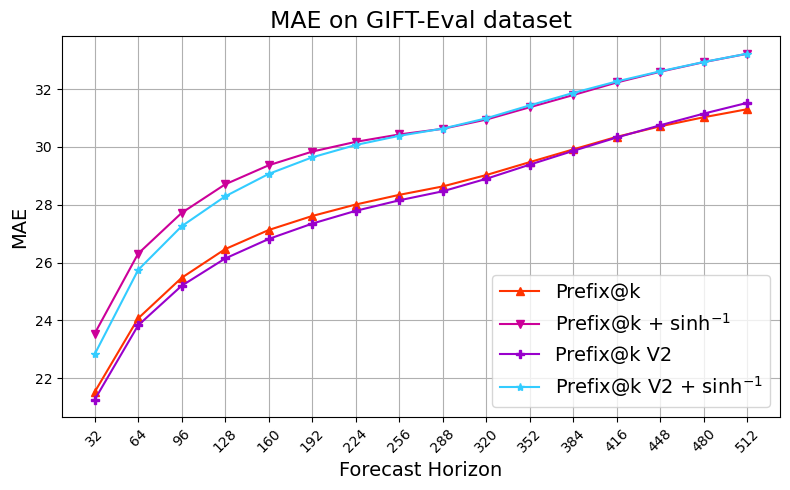

In [58]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mae_prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mae_prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.plot(all_mae_prefix2, marker=dic_model_symbols["Prefix RevIN 2"], label="Prefix@k V2", color=dic_model_colors["Prefix RevIN 2"])
plt.plot(all_mae_prefix2_asinh, marker=dic_model_symbols["Prefix RevIN 2 + asinh"], label=r"Prefix@k V2 + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN 2 + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MAE on GIFT-Eval dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MAE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
#plt.savefig(f'figures/plots_prefix/mae_ranking_horizon_gift_eval_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

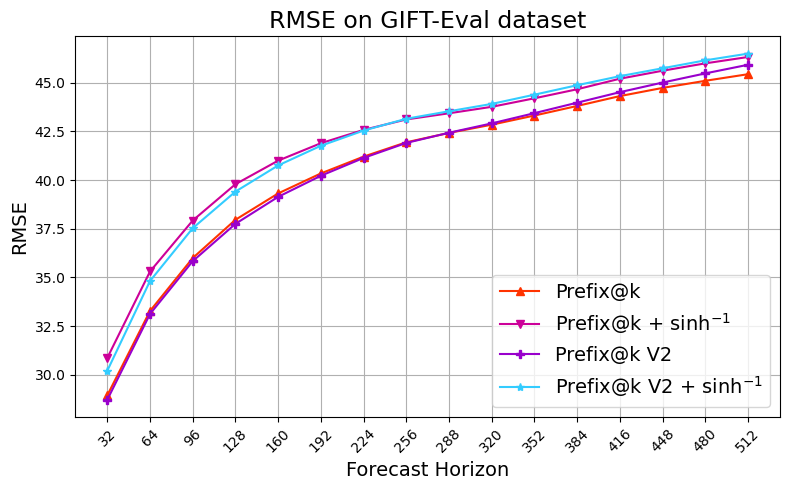

In [59]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_rmse_prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_rmse_prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.plot(all_rmse_prefix2, marker=dic_model_symbols["Prefix RevIN 2"], label="Prefix@k V2", color=dic_model_colors["Prefix RevIN 2"])
plt.plot(all_rmse_prefix2_asinh, marker=dic_model_symbols["Prefix RevIN 2 + asinh"], label=r"Prefix@k V2 + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN 2 + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("RMSE on GIFT-Eval dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("RMSE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
#plt.savefig(f'figures/plots_prefix/rmse_ranking_horizon_gift_eval_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

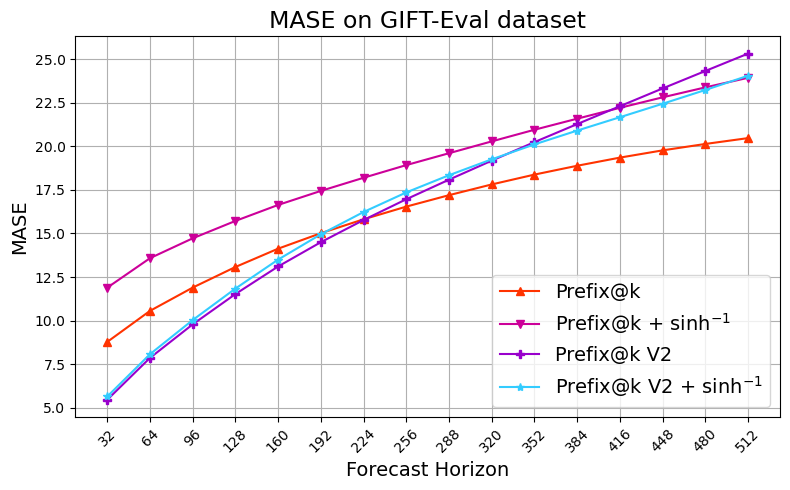

In [60]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mase_prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mase_prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.plot(all_mase_prefix2, marker=dic_model_symbols["Prefix RevIN 2"], label="Prefix@k V2", color=dic_model_colors["Prefix RevIN 2"])
plt.plot(all_mase_prefix2_asinh, marker=dic_model_symbols["Prefix RevIN 2 + asinh"], label=r"Prefix@k V2 + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN 2 + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MASE on GIFT-Eval dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MASE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
#plt.savefig(f'figures/plots_prefix/mase_ranking_horizon_gift_eval_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

# UTSD

In [61]:
all_mae_prefix, all_rmse_prefix, all_mase_prefix, sizes = [], [], [], []
for k, v in metrics_prefix_utsd.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix.append(v)
        sizes.append(size)
    elif metric.lower() == "rmse":
        all_rmse_prefix.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix.append(v)

all_mae_prefix_asinh, all_rmse_prefix_asinh, all_mase_prefix_asinh = [], [], []
for k, v in metrics_prefix_asinh_utsd.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_prefix_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix_asinh.append(v)
        
all_mae_prefix2, all_rmse_prefix2, all_mase_prefix2 = [], [], []
for k, v in metrics_prefix2_utsd.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix2.append(v)
    elif metric.lower() == "rmse":
        all_rmse_prefix2.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix2.append(v)

all_mae_prefix2_asinh, all_rmse_prefix2_asinh, all_mase_prefix2_asinh = [], [], []
for k, v in metrics_prefix2_asinh_utsd.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix2_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_prefix2_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix2_asinh.append(v)

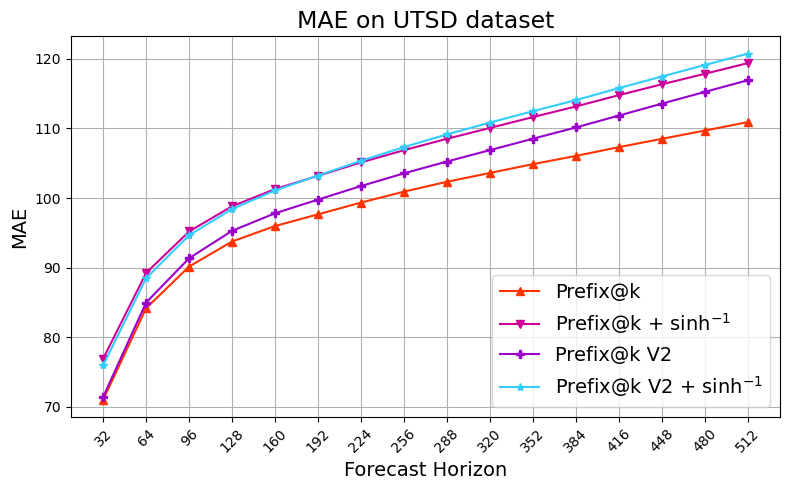

In [62]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mae_prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mae_prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.plot(all_mae_prefix2, marker=dic_model_symbols["Prefix RevIN 2"], label="Prefix@k V2", color=dic_model_colors["Prefix RevIN 2"])
plt.plot(all_mae_prefix2_asinh, marker=dic_model_symbols["Prefix RevIN 2 + asinh"], label=r"Prefix@k V2 + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN 2 + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MAE on UTSD dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MAE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
#plt.savefig(f'figures/plots_prefix/mae_ranking_horizon_utsd_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

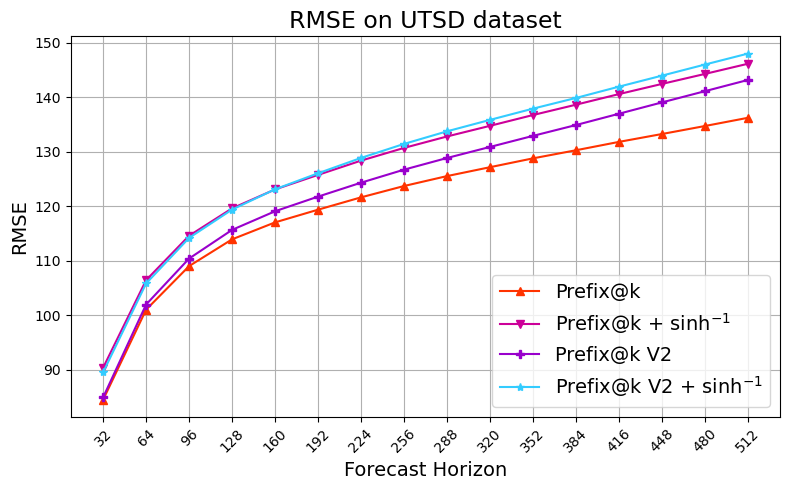

In [63]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_rmse_prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_rmse_prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.plot(all_rmse_prefix2, marker=dic_model_symbols["Prefix RevIN 2"], label="Prefix@k V2", color=dic_model_colors["Prefix RevIN 2"])
plt.plot(all_rmse_prefix2_asinh, marker=dic_model_symbols["Prefix RevIN 2 + asinh"], label=r"Prefix@k V2 + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN 2 + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("RMSE on UTSD dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("RMSE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
#plt.savefig(f'figures/plots_prefix/rmse_ranking_horizon_utsd_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

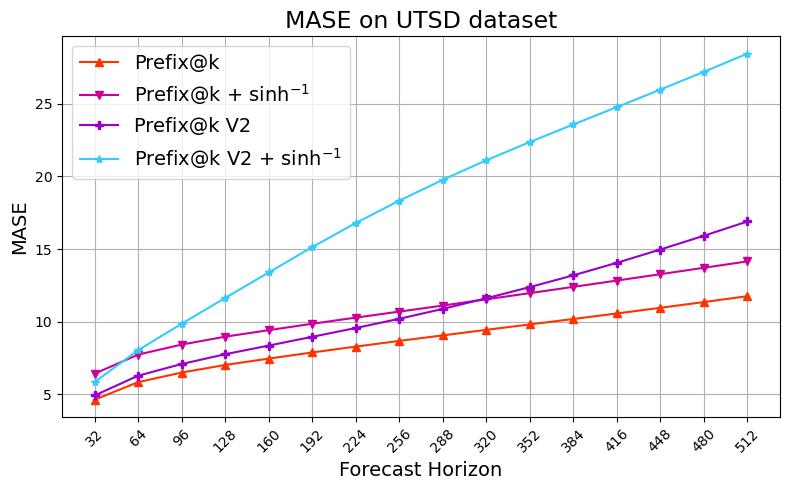

In [64]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mase_prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mase_prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.plot(all_mase_prefix2, marker=dic_model_symbols["Prefix RevIN 2"], label="Prefix@k V2", color=dic_model_colors["Prefix RevIN 2"])
plt.plot(all_mase_prefix2_asinh, marker=dic_model_symbols["Prefix RevIN 2 + asinh"], label=r"Prefix@k V2 + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN 2 + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MASE on UTSD dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MASE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
#plt.savefig(f'figures/plots_prefix/mase_ranking_horizon_utsd_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

# Artificial

In [65]:
all_mae_prefix, all_rmse_prefix, all_mase_prefix, sizes = [], [], [], []
for k, v in metrics_prefix_artificial.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix.append(v)
        sizes.append(size)
    elif metric.lower() == "rmse":
        all_rmse_prefix.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix.append(v)

all_mae_prefix_asinh, all_rmse_prefix_asinh, all_mase_prefix_asinh = [], [], []
for k, v in metrics_prefix_asinh_artificial.items(): 
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_prefix_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix_asinh.append(v)

all_mae_prefix2, all_rmse_prefix2, all_mase_prefix2 = [], [], []
for k, v in metrics_prefix2_artificial.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix2.append(v)
    elif metric.lower() == "rmse":
        all_rmse_prefix2.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix2.append(v)

all_mae_prefix2_asinh, all_rmse_prefix2_asinh, all_mase_prefix2_asinh = [], [], []
for k, v in metrics_prefix2_asinh_artificial.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_prefix2_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_prefix2_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_prefix2_asinh.append(v)

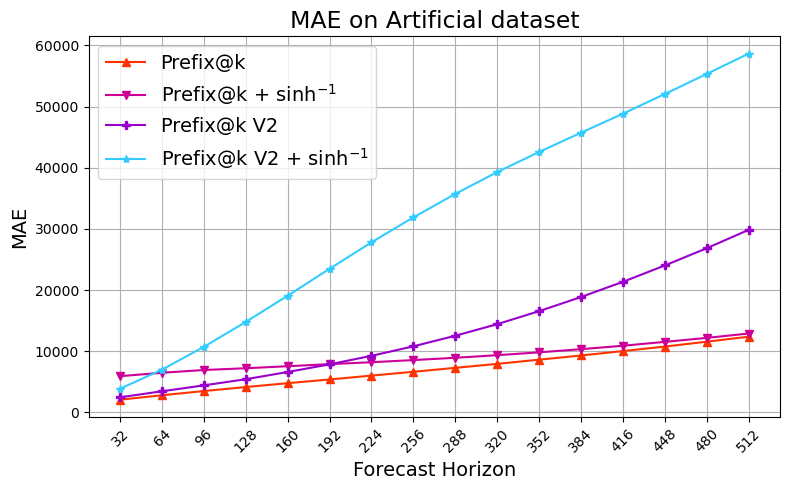

In [66]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mae_prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mae_prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.plot(all_mae_prefix2, marker=dic_model_symbols["Prefix RevIN 2"], label="Prefix@k V2", color=dic_model_colors["Prefix RevIN 2"])
plt.plot(all_mae_prefix2_asinh, marker=dic_model_symbols["Prefix RevIN 2 + asinh"], label=r"Prefix@k V2 + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN 2 + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MAE on Artificial dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MAE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
#plt.savefig(f'figures/plots_prefix/mae_ranking_horizon_artificial_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

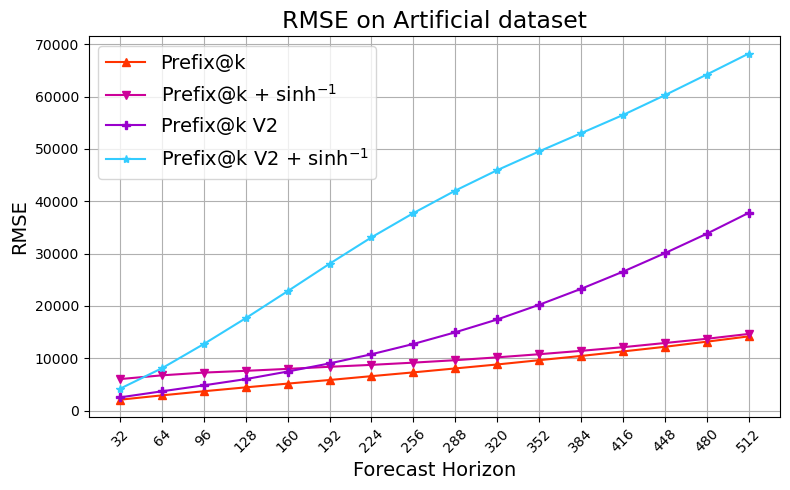

In [67]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_rmse_prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_rmse_prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.plot(all_rmse_prefix2, marker=dic_model_symbols["Prefix RevIN 2"], label="Prefix@k V2", color=dic_model_colors["Prefix RevIN 2"])
plt.plot(all_rmse_prefix2_asinh, marker=dic_model_symbols["Prefix RevIN 2 + asinh"], label=r"Prefix@k V2 + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN 2 + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("RMSE on Artificial dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("RMSE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
#plt.savefig(f'figures/plots_prefix/rmse_ranking_horizon_artificial_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

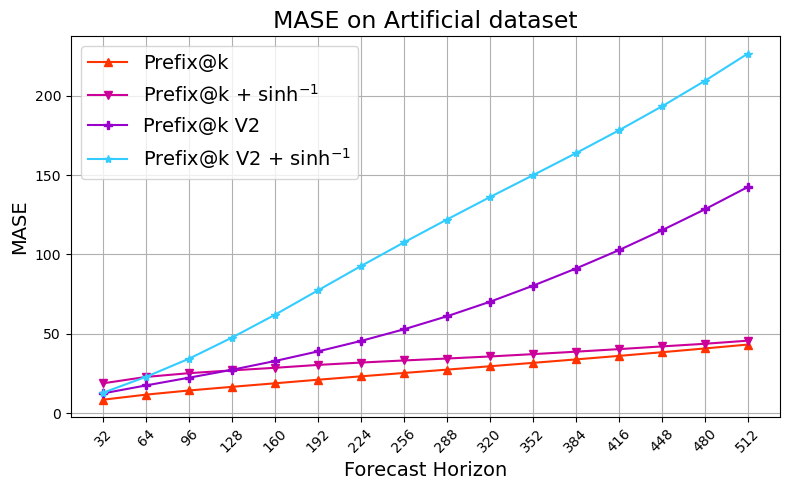

In [68]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mase_prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mase_prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.plot(all_mase_prefix2, marker=dic_model_symbols["Prefix RevIN 2"], label="Prefix@k V2", color=dic_model_colors["Prefix RevIN 2"])
plt.plot(all_mase_prefix2_asinh, marker=dic_model_symbols["Prefix RevIN 2 + asinh"], label=r"Prefix@k V2 + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN 2 + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MASE on Artificial dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MASE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
#plt.savefig(f'figures/plots_prefix/mase_ranking_horizon_artificial_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

# Critical Rank Diagram

In [69]:
full_df = {}
full_df['Prefix RevIN'] = {
    'GIFT-Eval': metrics_prefix_gift_eval,
    'UTSD': metrics_prefix_utsd,
    'Artificial': metrics_prefix_artificial
}
full_df['Prefix RevIN + asinh'] = {
    'GIFT-Eval': metrics_prefix_asinh_gift_eval,
    'UTSD': metrics_prefix_asinh_utsd,
    'Artificial': metrics_prefix_asinh_artificial
}
full_df['Prefix RevIN 2'] = {
    'GIFT-Eval': metrics_prefix2_gift_eval,
    'UTSD': metrics_prefix2_utsd,
    'Artificial': metrics_prefix2_artificial
}
full_df['Prefix RevIN 2 + asinh'] = {
    'GIFT-Eval': metrics_prefix2_asinh_gift_eval,
    'UTSD': metrics_prefix2_asinh_utsd,
    'Artificial': metrics_prefix2_asinh_artificial
}

In [70]:
new_df_mae = {}
new_df_mse = {}
new_df_mase = {}
for model_name, datasets in full_df.items():
    new_df_mae[model_name] = {}
    new_df_mse[model_name] = {}
    new_df_mase[model_name] = {}
    for dataset_name, metrics in datasets.items():
        for k, v in metrics.items():
            metric, size = k.split("_")
            if metric.lower() == "mae":
                new_df_mae[model_name][f"{dataset_name}_{size}"] = v
            elif metric.lower() == "rmse":
                new_df_mse[model_name][f"{dataset_name}_{size}"] = v 
            elif metric.lower() == "mase":
                new_df_mase[model_name][f"{dataset_name}_{size}"] = v

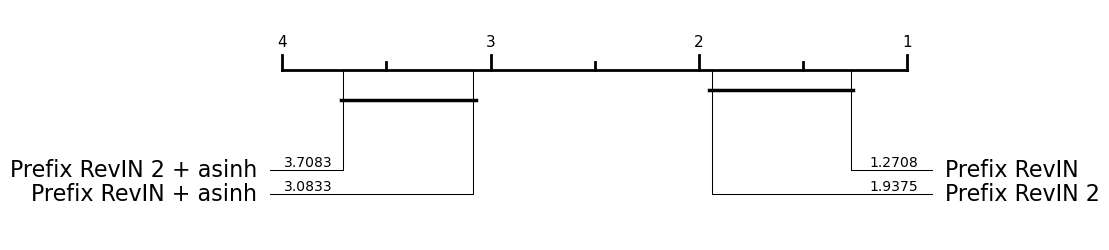

In [71]:
# Create Critical Difference plot for MAE
df_mae = pd.DataFrame(new_df_mae)
methods = df_mae.columns
plot = plot_critical_difference(df_mae.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)

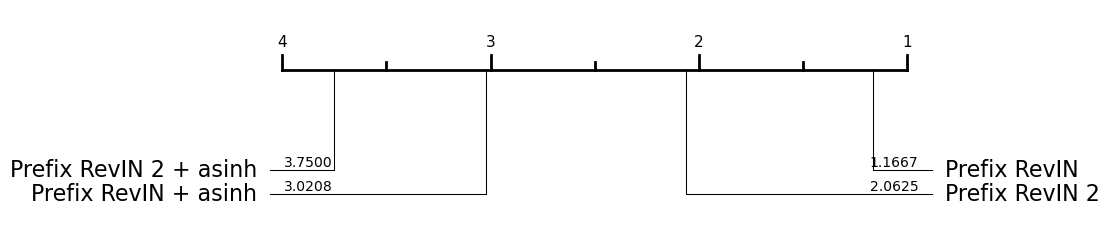

In [72]:
# Create Critical Difference plot for MAE
df_mse = pd.DataFrame(new_df_mse)
methods = df_mse.columns
plot = plot_critical_difference(df_mse.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)

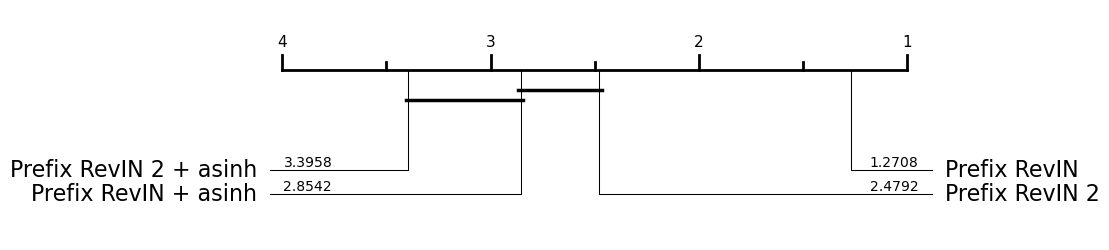

In [73]:
# Create Critical Difference plot for MASE
df_mase = pd.DataFrame(new_df_mase)
methods = df_mase.columns
plot = plot_critical_difference(df_mase.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)